<center><img src=img/MScAI_brand.png width=70%></center>

# Week 8 Exercises 

### Exercise

Recall this graph in adjacency-lists format: 

In [10]:
G = {
    0: [1, 2, 3], 
    1: [0, 3], 
    2: [0], 
    3: [0, 1], 
    4: []
}

<center><img src=img/exercise_graph.svg width=40%></center>

We can write it in adjacency-lists format:

In [10]:
G = {
    0: [1, 2, 3], 
    1: [0, 3], 
    2: [0], 
    3: [0, 1], 
    4: []
}

Adjacency matrix (NB, the row and column labels are shown for convenience but are not part of the matrix):

```
  | 0 1 2 3 4
--+----------
0 | 0 1 1 1 0
1 | 1 0 0 1 0
2 | 1 0 0 0 0
3 | 1 1 0 0 0
4 | 0 0 0 0 0
```

* What is the disadvantage of the adjacency matrix format? Hint: consider a graph of 1 million nodes.

* Calculate the sum of row 0 in the adjacency matrix. What does it mean?
* What do you observe about the diagonal, and about symmetry?
* Suppose you saw a 1 on the diagonal. How could this be represented when drawing the graph on paper? Think of a real-world situation where this would be useful.

List of edges format:

```python
G = [
    (0, 1),
    (0, 2),
    (0, 3),
    (1, 3)
]
```

* Consider again the list of edges format, where each edge is a 2-tuple. Are there any disadvantages of this format? (Hint: consider the same graph as before.)


### Exercise

The **predecessor-pointer** format can be used to represent a **tree**. Eg, `'b': 's'` means that there is a directed edge:

`s -> b`.

In [12]:
G = {
'd': 'c',
'c': 'f',
'a': 's',
'f': 'g',
'e': 'g',
'b': 's',
'g': 'b',
}

And sometimes a tree has a special node, the **root** - all edges point away from the root. 

In [ ]:
G_root = 's'

* Write a piece of code to traverse from a node `x`, say `x = c`, to the root, printing out each node we visit on the way.

### NetworkX exercises

Recall we can make a graph like this, for example:

In [2]:
import networkx as nx # conventional import
G = nx.Graph()
G.add_edge(0, 1, w=0.5)
G.add_edge(0, 2, w=0.1)
G.add_edge(0, 3, w=0.1)
G.add_edge(1, 3, w=0.3)

In [3]:
G.nodes()

NodeView((0, 1, 2, 3, 4))

In [4]:
G.edges()

EdgeView([])

In [7]:
G.edges(data=True)

EdgeDataView([(0, 1, {'w': 0.5}), (0, 2, {'w': 0.1}), (0, 3, {'w': 0.1}), (1, 3, {'w': 0.3})])

And now, notice that `G` itself functions as a `dict`, mapping from a node to its adjacency list **with edge properties**:

In [8]:
for node in G.nodes():
    print(node, ":", G[node])

0 : {1: {'w': 0.5}, 2: {'w': 0.1}, 3: {'w': 0.1}}
1 : {0: {'w': 0.5}, 3: {'w': 0.3}}
2 : {0: {'w': 0.1}}
3 : {0: {'w': 0.1}, 1: {'w': 0.3}}
4 : {}


### Exercise

We'll see how to read in a graph to NetworkX from a plain-text format, and run some algorithms on it. The scenario is: on an island there are several towns, all connected by a road network, but until now there was no electricity.

We have built a power plant at town 0. The Minister has decided to build the new electricity network along the roads. We want to achieve connectivity to all towns at minimum cost. 

Our city locations are stored in `data/power_plant_city_locations.npy` and the edges and edge weights in `data/power_plant_weighted_edgelist.dat`. 

In [145]:
import networkx as nx
G = nx.read_weighted_edgelist("data/power_plant_weighted_edgelist.dat",
                              nodetype=int)

In [146]:
import numpy as np
locs = np.load("data/power_plant_city_locations.npy")

* As we can see in the `.dat` file, it is just an edge-list with weights. Why are we not worried about the possibility of isolated nodes, not captured by the edge list, like the Pucci family in the Florentine families exercise?

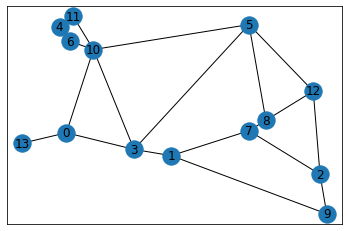

In [132]:
nx.draw_networkx(G, pos=locs)

### Exercises

1. Calculate the number of towns and roads.
2. Confirm that the road network is fully connected. Use `nx.is_connected()`.
3. Use Kruskal's Minimum Spanning Tree to find the lowest-cost electricity network. How much will it cost? Use `nx.minimum_spanning_tree` and then sum the weights.
4. The Minister is planning to take a drive in her Mercedes when she comes to cut the ribbon. She will travel from the power plant to the most distant village, using the fastest route. What is that distance? Use `nx.single_source_dijkstra`.

**Kruskal's Minimum Spanning Tree** algorithm finds an MST, that is a tree with the same nodes as the original graph, and a subset of the edges, such that in the tree all nodes are connected, and the sum of edge-weights in the tree is as small as possible. This solves the problem of building the electricity network because the cost of constructing an edge is proportional to the edge distance.

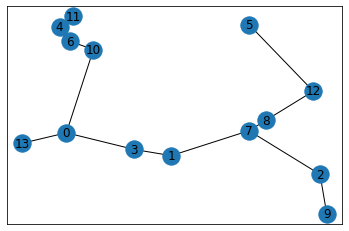

In [139]:
# Draw a subgraph, reusing the same node positions
# the following assumes we have already calculated `mst` in the previous exercise
nx.draw_networkx(G.edge_subgraph(mst.edges()), pos=locs)

Notice this is not a tour (a circular path visiting all nodes exactly once). If you've heard of the **Travelling Salesman Problem**, this is **not** it.

**Dijkstra's algorithm** is a famous algorithm for finding the shortest path from a node to all other nodes. Here "shortest path" takes account of edge weights. In our case, the edge weight is a measure of the distance. We have to say which node we want to start from (0) and which edge property to use (here, `"weight"`).